In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import keras
from keras.preprocessing import image
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten,Dense,Dropout,BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2
from tensorflow.keras.applications import VGG16, InceptionResNetV2
from keras import regularizers
from tensorflow.keras.optimizers import Adam,RMSprop,SGD,Adamax

In [8]:
train_dir = r"D:\University\0 دانشگاه علم و صنعت ایران\0 نیمسال های تحصیلی\7 ترم هفت\6 هوش مصنوعی\Project\Datasets\1 FER-2013\2\archive\train" 
test_dir = r"D:\University\0 دانشگاه علم و صنعت ایران\0 نیمسال های تحصیلی\7 ترم هفت\6 هوش مصنوعی\Project\Datasets\1 FER-2013\2\archive\test"   

In [9]:
import tensorflow as tf
import keras
from keras.layers import Conv2D, MaxPool2D, Flatten,Dense,Dropout,BatchNormalization
model= tf.keras.models.Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(48, 48,1)))
model.add(Conv2D(64,(3,3), padding='same', activation='relu' ))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(5,5), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
    
model.add(Conv2D(512,(3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(512,(3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten()) 
model.add(Dense(256,activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))
    
model.add(Dense(512,activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Dense(7, activation='softmax'))

In [10]:
img_size=48

In [11]:
train_datagen = ImageDataGenerator(width_shift_range = 0.1,
                                         height_shift_range = 0.1,
                                         horizontal_flip = True,
                                         rescale = 1./255,
                                         validation_split = 0.2
                                        )
validation_datagen = ImageDataGenerator(rescale = 1./255,
                                         validation_split = 0.2)

In [12]:
train_generator = train_datagen.flow_from_directory(directory = train_dir,
                                                    target_size = (img_size,img_size),
                                                    batch_size = 64,
                                                    color_mode = "grayscale",
                                                    class_mode = "categorical",
                                                    subset = "training"
                                                   )
validation_generator = validation_datagen.flow_from_directory( directory = test_dir,
                                                              target_size = (img_size,img_size),
                                                              batch_size = 64,
                                                              color_mode = "grayscale",
                                                              class_mode = "categorical",
                                                              subset = "validation"
                                                             )

Found 22968 images belonging to 7 classes.
Found 1432 images belonging to 7 classes.


In [14]:
model.compile(
    optimizer = Adam(learning_rate=0.001), 
    loss='categorical_crossentropy', 
    metrics=['accuracy']
  )

In [15]:
epochs = 45
batch_size = 64

In [16]:
history = model.fit(x = train_generator,epochs = epochs,validation_data = validation_generator)

c:\Users\A\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/45
359/359 ━━━━━━━━━━━━━━━━━━━━ 384s 1s/step - accuracy: 0.2125 - loss: 2.2596 - val_accuracy: 0.1718 - val_loss: 2.5244
Epoch 2/45
359/359 ━━━━━━━━━━━━━━━━━━━━ 408s 1s/step - accuracy: 0.3033 - loss: 1.7991 - val_accuracy: 0.3659 - val_loss: 1.9815
Epoch 3/45
359/359 ━━━━━━━━━━━━━━━━━━━━ 389s 1s/step - accuracy: 0.4089 - loss: 1.5410 - val_accuracy: 0.4358 - val_loss: 1.4463
Epoch 4/45
359/359 ━━━━━━━━━━━━━━━━━━━━ 364s 1s/step - accuracy: 0.4743 - loss: 1.3773 - val_accuracy: 0.4770 - val_loss: 1.4768
Epoch 5/45
359/359 ━━━━━━━━━━━━━━━━━━━━ 357s 994ms/step - accuracy: 0.5008 - loss: 1.2890 - val_accuracy: 0.5000 - val_loss: 1.3026
Epoch 6/45
359/359 ━━━━━━━━━━━━━━━━━━━━ 355s 990ms/step - accuracy: 0.5288 - loss: 1.2348 - val_accuracy: 0.5670 - val_loss: 1.1499
Epoch 7/45
359/359 ━━━━━━━━━━━━━━━━━━━━ 354s 984ms/step - accuracy: 0.5530 - loss: 1.1723 - val_accuracy: 0.5873 - val_loss: 1.1539
Epoch 8/45
359/359 ━━━━━━━━━━━━━━━━━━━━ 355s 989ms/step - accuracy: 0.5606 - loss: 1.150

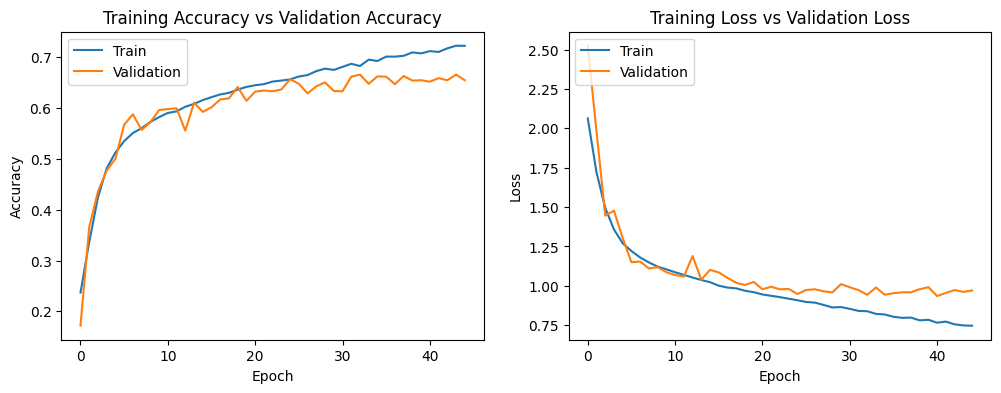

In [17]:
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
fig.set_size_inches(12,4)

ax[0].plot(history.history['accuracy'])
ax[0].plot(history.history['val_accuracy'])
ax[0].set_title('Training Accuracy vs Validation Accuracy')
ax[0].set_ylabel('Accuracy')
ax[0].set_xlabel('Epoch')
ax[0].legend(['Train', 'Validation'], loc='upper left')

ax[1].plot(history.history['loss'])
ax[1].plot(history.history['val_loss'])
ax[1].set_title('Training Loss vs Validation Loss')
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epoch')
ax[1].legend(['Train', 'Validation'], loc='upper left')

plt.show()

In [20]:
model.save_weights('model_weights_FER.weights.h5')

In [21]:
model.save('model_FER.h5')  # No restriction on `.weights.h5` here

If found useful,Please Upvote!!